In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Math, Latex
from IPython.display import Image

# Exploring The Data

In [5]:
school_enroll = pd.read_csv('School Enroll.csv')
school_facilities = pd.read_csv('School Facilities.csv')

In [5]:
school_enroll.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


In [6]:
school_facilities.head()

,STATCD,STATNAME,OVERALL_LI,ROAD1,ROAD2,ROAD3,ROAD4,ROAD5,ROAD6,ROAD7,...,KIT7,KITTOT,KITS1,KITS2,KITS3,KITS4,KITS5,KITS6,KITS7,KITSTOT
0,1,JAMMU & KASHMIR,68.74,10772,8406,469,124,86,2386,391,...,310,15074,11917,7743,74,97,76,1377,390,21674
1,2,HIMACHAL PRADESH,83.78,8960,773,562,1715,1490,669,760,...,849,14268,10626,1,0,2012,1604,0,874,15117
2,3,PUNJAB,76.68,14317,2551,2581,2858,1751,2725,1867,...,1704,18042,12352,33,144,2660,1593,49,1734,18565
3,4,CHANDIGARH,86.43,12,29,85,0,5,70,0,...,0,7,0,0,5,0,0,2,0,7
4,5,UTTARAKHAND,79.63,11551,1514,478,2581,1311,161,618,...,732,15644,12453,22,37,2910,1458,7,813,17700


In [24]:
sch_f = pd.read_csv('fin.csv')

In [7]:
def sort_vals(df,col):
    
    df_new = df.sort_values(by = col)
    df_new.reset_index().drop('index', axis = 1, inplace = True)
    return df_new

In [8]:
def plot_barh(df, col1, col2, size = (10,10), title = None, xlabel = None):
    
    fig, ax = plt.subplots(1,1,figsize = size)
    plt.barh(df[col1],df[col2],label = col2)
            
    if title:
        ax.set_title(title)   
    
    if xlabel:
        ax.set_xlabel(xlabel)

In [7]:
school_enroll = sort_vals(school_enroll, 'OVERALL_LI')

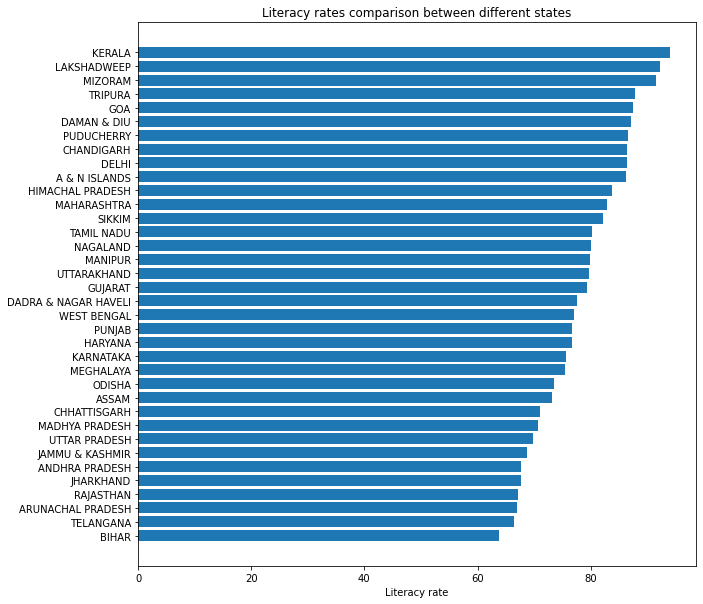

In [8]:
plot_barh(school_enroll, 'STATNAME', 'OVERALL_LI', title = 'Literacy rates comparison \
between different states' , xlabel = 'Literacy rate')

# This graph denotes the literacy rate between states
Kerala has the highest rate whereas Bihar has the lowest literacy rate

<AxesSubplot:xlabel='STATNAME'>

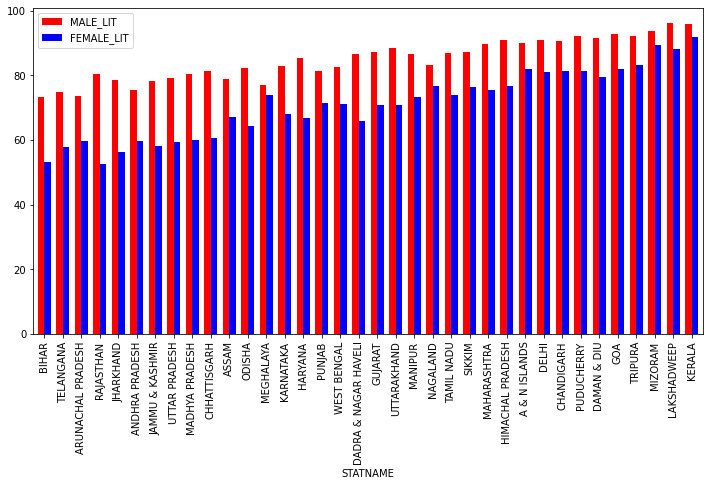

In [10]:
sorted_lit = sort_vals(school_enroll, 'OVERALL_LI')
sorted_lit.plot(kind = 'bar',x = 'STATNAME',y = ['MALE_LIT','FEMALE_LIT'],stacked = False,figsize=(12,6),width = 0.7,color = ['red','blue'])

# This graph shows the literacy rate between men and women
# Northeastern states on an average have less difference between male and female literacy rate

# STATISTICAL ANALYSIS

In [21]:
import statsmodels.api as sm
import pylab

C:\Users\Florence\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


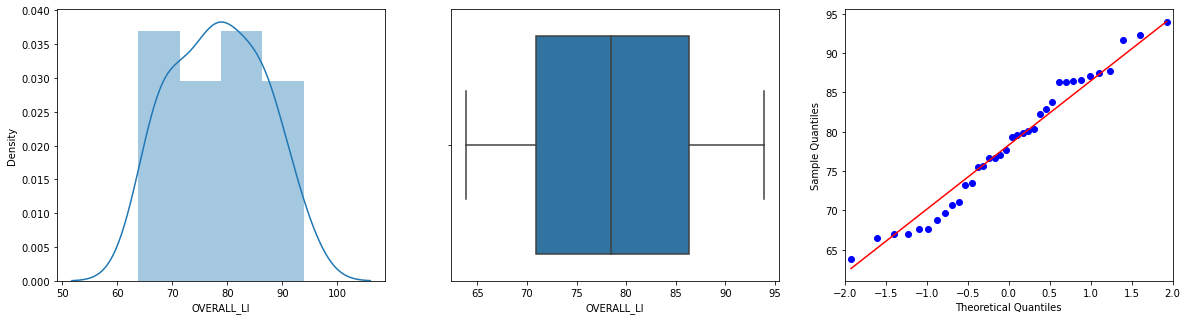

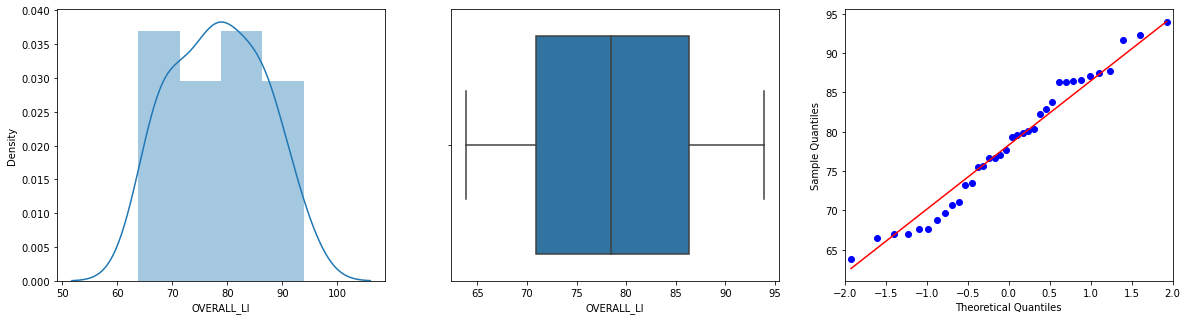

In [22]:
fig, a=plt.subplots(1, 3, figsize=(20,5))
sns.distplot(school_facilities['OVERALL_LI'], hist=True, kde=True, ax=a[0])
sns.boxplot(x=school_facilities['OVERALL_LI'], ax=a[1])
sm.qqplot(school_facilities['OVERALL_LI'], line='s', ax=a[2])

# The histogram states that the max states have literacy rate between the range of 75-80%
# The box plot tells that the distribution is normal and the data is symmetric

# HYPOTHESIS TESTING

# PEARSONS CORRELATION COEFFICIENT

In [23]:
corr, _ = stats.pearsonr(school_enroll["OVERALL_LI"],sch_f["ROADTOTPERC"] )
print("pearsons corr %.3f" % corr)

pearsons corr 0.512
